# Word Count and sentiment analysis of ECN (NLP)


### description, special instruction and title


### works repetition high requency image 

### repeated words count

### sentiment analysis



## Recommendation

In [1]:
# Required Imports
import pandas as pd
import nltk
#import keras

import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data['tokens'] = data['text'].apply(tokenizer.tokenize)
data[['text', 'tokens']].head()

In [2]:
#creating dataframe 
df1 = pd.read_csv('nlp-data.csv')

In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,RELEASE_DATE,CLASSIFICATION,KEYED_NAME,CREATED_ON,ID,OWNED_BY_ID,CREATED_BY_ID,MODIFIED_BY_ID,MANAGED_BY_ID,MODIFIED_ON,...,SPECIAL_INSTRUCTIONS,TITLE,STATE,RH_ESTIMATED_IMPLEMENTATION_DATE,RH_RELEASE_TYPE,RH_PRODUCT_GROUP,RH_OWNER_DEPARTMENT,RH_CHANGE_CATEGORY,RH_CREATED_BY_DIVISION,RH_PRODUCTION_DESIGNATION
0,55:31.0,NaN,ECN-7787,05:29.3,0003BBE18CC94AB0A0A8E33741D72A75,9F071C97417346E0942860F4B6E20CAB,5E8146986A6A434D875FCDC59F9EF7CE,6D7971B909B942E8842722FCB1B41FDE,NaN,56:31.8,...,Per feedback from ICL and Project engineer,Refractory changes 1MM & 1.5MM,Completed,NaN,Project/NPI,XVERS W/KOR,R & D Eng,Drawing Change,Raypak,NaN
1,13:47.0,NaN,EC07143,05:16.0,00193BDEC74B4B349B62F4CF06E825FA,3A102D05B09A4CFD943A0F88DCC4462C,66A7F9F13758481A8365B11EA4C965D9,F44BA6A37A5048A48CA0AAB9881A987F,NaN,02:39.7,...,Display units are duplicated using the same co...,Gen V HPWH PSS Revision,Completed,NaN,Maintenance,HPWH,R & D Eng,Drawing Change,WH,NaN
2,03:51.0,NaN,EC06768BW,17:15.1,0079ABE913D14523A0E0F2ED24C90C0D,7D003C82BBDE4C20BD9BC1EA06CA224F,335C0F17DA6442ADA38D9C6DFFAD63A6,D05D760E41304C55B1304A2936BD7AD8,NaN,03:51.5,...,HPWH Project has the PSO & Pilot Run this mont...,EC06768BW,Completed,NaN,Project/NPI,HPWH,R & D Eng,Drawing Change,WH,NaN
3,16:48.0,NaN,ECN-7789,01:49.9,008AEA179613463F8A4215221F7B19F3,9F071C97417346E0942860F4B6E20CAB,5E8146986A6A434D875FCDC59F9EF7CE,9357DD6C3FBA45DFA2A7DDE7DD31FF31,NaN,18:03.5,...,after reviewing plenum assembly and burner fla...,3MM & 4MM Refractories minor update,Completed,NaN,Project/NPI,XVERS W/KOR,R & D Eng,Drawing Change,Raypak,NaN
4,14:45.0,NaN,EC06619AX,35:06.5,00AFECD7757040CFA2C014345124BFDD,358ED79676F346A09FA6AB7B0FE9A600,C0CA2B7147EA442AAA851AF487B98ED4,D05D760E41304C55B1304A2936BD7AD8,NaN,14:45.5,...,"AS49064 was released at EC06619AC, but BOM was...",Super High Efficiency Gas Tankless Water Heater,Completed,NaN,Project/NPI,Tankless Gas,R & D Eng,BOM Change,WH,NaN


In [4]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RELEASE_DATE                      1925 non-null   object 
 1   CLASSIFICATION                    0 non-null      float64
 2   KEYED_NAME                        2342 non-null   object 
 3   CREATED_ON                        2342 non-null   object 
 4   ID                                2342 non-null   object 
 5   OWNED_BY_ID                       2342 non-null   object 
 6   CREATED_BY_ID                     2342 non-null   object 
 7   MODIFIED_BY_ID                    2342 non-null   object 
 8   MANAGED_BY_ID                     0 non-null      float64
 9   MODIFIED_ON                       2342 non-null   object 
 10  CURRENT_STATE                     2342 non-null   object 
 11  LOCKED_BY_ID                      68 non-null     object 
 12  MAJOR_

In [5]:
df1.columns

Index(['RELEASE_DATE', 'CLASSIFICATION', 'KEYED_NAME', 'CREATED_ON', 'ID',
       'OWNED_BY_ID', 'CREATED_BY_ID', 'MODIFIED_BY_ID', 'MANAGED_BY_ID',
       'MODIFIED_ON', 'CURRENT_STATE', 'LOCKED_BY_ID', 'MAJOR_REV',
       'IS_CURRENT', 'NOT_LOCKABLE', 'IS_RELEASED', 'MINOR_REV', 'CSS',
       'GENERATION', 'PERMISSION_ID', 'NEW_VERSION', 'CONFIG_ID', 'TEAM_ID',
       'BASIS', 'DESCRIPTION', 'CUSTOMER_APPROVAL', 'EFFECTIVITY_DATE',
       'ITEM_NUMBER', 'IMPLEMENTATION_PLAN', 'PRIORITY',
       'SPECIAL_INSTRUCTIONS', 'TITLE', 'STATE',
       'RH_ESTIMATED_IMPLEMENTATION_DATE', 'RH_RELEASE_TYPE',
       'RH_PRODUCT_GROUP', 'RH_OWNER_DEPARTMENT', 'RH_CHANGE_CATEGORY',
       'RH_CREATED_BY_DIVISION', 'RH_PRODUCTION_DESIGNATION'],
      dtype='object')

In [6]:
# based on which columns we have to filter

# Division only "water heater"
# 

In [7]:
# filter for each item as a separet df file
df1['RH_CREATED_BY_DIVISION'].unique()

array(['Raypak', 'WH', 'AC', 'Intergas', 'HTPG'], dtype=object)

In [8]:
# this can be a good point to find an exact person and info related to that
# df1['OWNED_BY_ID'].unique()

In [9]:
df1['RH_CHANGE_CATEGORY'].unique()

array(['Drawing Change', 'BOM Change', 'Product Improvement',
       'New End Item(s)', 'Cost Reduction', 'Regulation',
       'Customer Request', 'Quality Improvement', 'Literature Change',
       nan, 'Safety Issue'], dtype=object)

In [10]:
df1['RH_PRODUCT_GROUP'].unique()

array(['XVERS W/KOR', 'HPWH', 'Tankless Gas', 'Residential Electric',
       'Multiple Groups', 'Commerial Package Units', 'Hi_Delta',
       'Commercial Splits', 'XPAK FT', 'Residential Gas', 'HPPH',
       'Commercial Gas', 'AVIA', 'Many', 'Residential Gas Furnaces',
       'XVERS L', 'IFIRE', 'Commercial', 'Residential Package Units',
       'Residential Splits', 'XFIIRE', 'MVB', 'XTherm',
       'International Commercial', 'Gas Fired Water Heaters',
       'Commercial Electric', 'International Residential',
       'Residential Air Handlers', 'Pool', 'S_22', 'XVERS', 'Coils',
       'Multiple group', 'Tankless Electric', '106_506 Pool', 'MVB RAPL',
       'Protege', 'Commercial IPL', 'HTPG Product group', 'SERVICE',
       'Crosswind', 'Daytona HE', 'E3T', 'Raytherm', 'Controls', 'Solar',
       'X_94', 'Gas Fired Boilers', 'VERSA SIMULATOR'], dtype=object)

In [11]:
df1['RH_OWNER_DEPARTMENT'].unique()

array(['R & D Eng', 'Manufacturing', 'Quality', 'Product Management', nan,
       'Procurement', 'Tech Support/Apps', 'Prod Mgmt'], dtype=object)

In [12]:
df11 = df1[['TITLE', 'DESCRIPTION', 'SPECIAL_INSTRUCTIONS', 'RH_RELEASE_TYPE',
       'RH_PRODUCT_GROUP', 'RH_OWNER_DEPARTMENT', 'RH_CHANGE_CATEGORY',
       'RH_CREATED_BY_DIVISION']]

In [13]:
df11.head()

,TITLE,DESCRIPTION,SPECIAL_INSTRUCTIONS,RH_RELEASE_TYPE,RH_PRODUCT_GROUP,RH_OWNER_DEPARTMENT,RH_CHANGE_CATEGORY,RH_CREATED_BY_DIVISION
0,Refractory changes 1MM & 1.5MM,"Adding to tolerance note ""UNLESS OTHERWISE SPE...",Per feedback from ICL and Project engineer,Project/NPI,XVERS W/KOR,R & D Eng,Drawing Change,Raypak
1,Gen V HPWH PSS Revision,Design Services:\nRevise drawings based on the...,Display units are duplicated using the same co...,Maintenance,HPWH,R & D Eng,Drawing Change,WH
2,EC06768BW,Update drawings per attached markups. These ch...,HPWH Project has the PSO & Pilot Run this mont...,Project/NPI,HPWH,R & D Eng,Drawing Change,WH
3,3MM & 4MM Refractories minor update,moving 2 center hole and patch locations to fi...,after reviewing plenum assembly and burner fla...,Project/NPI,XVERS W/KOR,R & D Eng,Drawing Change,Raypak
4,Super High Efficiency Gas Tankless Water Heater,Structure Bills of Material for the AS49064 pa...,"AS49064 was released at EC06619AC, but BOM was...",Project/NPI,Tankless Gas,R & D Eng,BOM Change,WH


In [14]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TITLE                   2342 non-null   object
 1   DESCRIPTION             2342 non-null   object
 2   SPECIAL_INSTRUCTIONS    2342 non-null   object
 3   RH_RELEASE_TYPE         2342 non-null   object
 4   RH_PRODUCT_GROUP        2342 non-null   object
 5   RH_OWNER_DEPARTMENT     2282 non-null   object
 6   RH_CHANGE_CATEGORY      2289 non-null   object
 7   RH_CREATED_BY_DIVISION  2342 non-null   object
dtypes: object(8)
memory usage: 146.5+ KB


In [15]:
df12 = df11[df11['RH_CREATED_BY_DIVISION'] == 'WH']

In [16]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 1 to 2341
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TITLE                   1366 non-null   object
 1   DESCRIPTION             1366 non-null   object
 2   SPECIAL_INSTRUCTIONS    1366 non-null   object
 3   RH_RELEASE_TYPE         1366 non-null   object
 4   RH_PRODUCT_GROUP        1366 non-null   object
 5   RH_OWNER_DEPARTMENT     1339 non-null   object
 6   RH_CHANGE_CATEGORY      1343 non-null   object
 7   RH_CREATED_BY_DIVISION  1366 non-null   object
dtypes: object(8)
memory usage: 96.0+ KB


In [17]:
df12['RH_CREATED_BY_DIVISION'].unique()

array(['WH'], dtype=object)

In [18]:
df12['RH_CHANGE_CATEGORY'].unique()

array(['Drawing Change', 'BOM Change', 'Product Improvement',
       'New End Item(s)', 'Regulation', 'Customer Request', nan,
       'Literature Change', 'Cost Reduction', 'Quality Improvement',
       'Safety Issue'], dtype=object)

In [19]:
df12['RH_OWNER_DEPARTMENT'].unique()

array(['R & D Eng', 'Manufacturing', 'Quality', nan, 'Product Management',
       'Prod Mgmt', 'Procurement'], dtype=object)

In [20]:
df12['RH_PRODUCT_GROUP'].unique()

array(['HPWH', 'Tankless Gas', 'Residential Electric', 'Multiple Groups',
       'Residential Gas', 'Commercial Gas', 'Commercial Electric',
       'Multiple group', 'Tankless Electric', 'Solar'], dtype=object)

In [21]:
df12['RH_RELEASE_TYPE'].unique()

array(['Maintenance', 'Project/NPI', 'CIP Maintenance'], dtype=object)

In [22]:
#creating dataframe df1 of "NL I09"
df2 =  df12[['TITLE', 'DESCRIPTION', 'SPECIAL_INSTRUCTIONS']]

In [23]:
df2.head()

,TITLE,DESCRIPTION,SPECIAL_INSTRUCTIONS
1,Gen V HPWH PSS Revision,Design Services:\nRevise drawings based on the...,Display units are duplicated using the same co...
2,EC06768BW,Update drawings per attached markups. These ch...,HPWH Project has the PSO & Pilot Run this mont...
4,Super High Efficiency Gas Tankless Water Heater,Structure Bills of Material for the AS49064 pa...,"AS49064 was released at EC06619AC, but BOM was..."
5,EC06973A,need to relocate LABEL - DO NOT RETURN as per ...,1) DO NOT RETURN LABEL placement need to be th...
6,Super High Efficiency Gas Tankless Water Heaters,Update AX5214 drawing per markup.,Found some errors on a drawing.


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 1 to 2341
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TITLE                 1366 non-null   object
 1   DESCRIPTION           1366 non-null   object
 2   SPECIAL_INSTRUCTIONS  1366 non-null   object
dtypes: object(3)
memory usage: 42.7+ KB


In [25]:
df2['TITLE'].value_counts()

Tankless Sustainable Packaging                                    12
SASO ENERGY LABELS                                                 9
Add Supplement Sheet (AP18234) information to U&C Manuals.         8
Super High Efficiency Gas Tankless Water Heater                    8
New KAP Com. Electric Variant                                      7
                                                                  ..
ULN Ph4 Level-2 BOMs                                               1
Vulcan Gas HPWH - gasket upper top pan and shroud                  1
EC06946K:65USG Rheem Canada Profesional Classic Electric Model     1
TRITON XL- Burner change for seam location                         1
Niagara - Ruud and Rhichmond carton brand labels                   1
Name: TITLE, Length: 1177, dtype: int64

In [26]:
df2['TITLE'].unique()

array(['Gen V HPWH PSS Revision', 'EC06768BW',
       'Super High Efficiency Gas Tankless Water Heater', ...,
       'NIAGARA - UPDATE OUTDOOR KIT',
       'Pinnacle Ph4 Residential Pilot Drawing Update',
       'Super High Efficiency Gas Tankless Water Heater PDR'],
      dtype=object)

In [27]:
df2['DESCRIPTION'].value_counts()

1. Drawing/model changes according to marked drawings.\n2. Release the drawings included in this ADR.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          7
Update all literature according to the standard ANSI Z21.10.1-2017 • CSA 4.1-2017\nSustaining Design Engineering Services\n1. Make changes to drawings according markup attached.\n\nTechnical Manual Coordinator\n1. Make changes to manuals according to the markup attached.                                                                                                                                        

In [28]:
df2['DESCRIPTION'].unique()

array(['Design Services:\nRevise drawings based on the attached markups.\n\nEngineering Services:\nSet end items 700466 & 700465 to LEVEL 6.',
       'Update drawings per attached markups. These changes needs to be complete next week at 02/13/20',
       'Structure Bills of Material for the AS49064 part numbers.', ...,
       'Update AP21064 with drawing changes.  This will be a minor revision.  Extension "A" is currently used in production, but these changes only make the drawing consistent with what is actually being supplied.  Extension "B" is not used in production yet.  This is for EC06634.  This needs to be released by Feb 11, 2021.',
       'Design Services:\nRevise AP18408 as per markups attached',
       'Update/Create BOM per the attached BI report'], dtype=object)

In [29]:
df2['SPECIAL_INSTRUCTIONS'].value_counts()

Washington State is requiring all electrics sold in their state to be DR ready by Jan 1, 2022                                                                                                                                                                                                                                                            19
All Rheem residential gas water heaters manuals need to be updated to the latest CSA/ANSI Z21.10.1:19 * CSA 4.1:19 Standard.\n\nNOTE:  EC MUST BE EFFECTIVE BEFORE MAY 1st, 2021                                                                                                                                                                         10
Customer request                                                                                                                                                                                                                                                                                                

In [30]:
df2['SPECIAL_INSTRUCTIONS'].unique()

array(['Display units are duplicated using the same configuration as 700463.\nMinor correction to the marketing model needed in order to match Oracle/AHRI on PSS-HB40G5, PSS-HB50G5, PSS-HB65G5 & PSS-HB80G5',
       'HPWH Project has the PSO & Pilot Run this month. These changes needs to be complete next week at 02/13/20',
       'AS49064 was released at EC06619AC, but BOM was not structured at the EC. AS49064A through M should have BOM. ',
       ..., 'Drawing change only.',
       'TOD supplier is shutdown, as an alternative to keep production running Resideo Thermistor will be used. \n\nSecond Release to revise resideo thermistor. Further EC will revise assy. burner drawings, and PSS sheet C to add the Alternate burner assy. in order for the plant to be able swap burner assy. as needed.',
       'BOM errors have found, and BOM of one end item has not been created yet. \nThis change request to update/create BOM.'],
      dtype=object)

In [31]:
df2.isnull().sum()

TITLE                   0
DESCRIPTION             0
SPECIAL_INSTRUCTIONS    0
dtype: int64

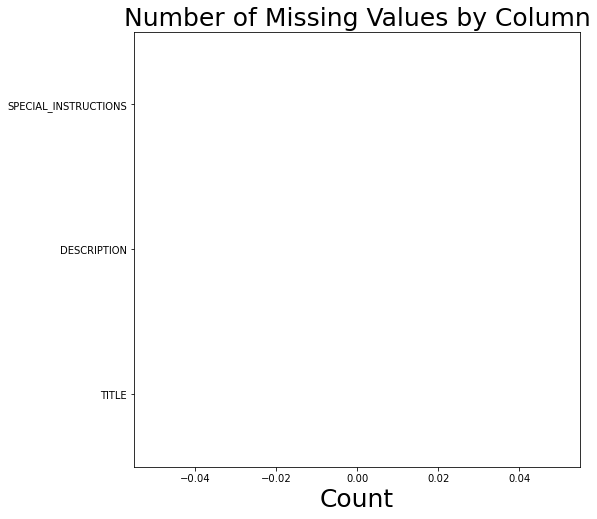

In [32]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (8,8))

df2.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

In [33]:
notes = df2['SPECIAL_INSTRUCTIONS']
df_notes = ' '.join(notes.to_list())

In [34]:
#!pip install wordcloud


In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
word_cloud = WordCloud(max_font_size=40).generate(df_notes)

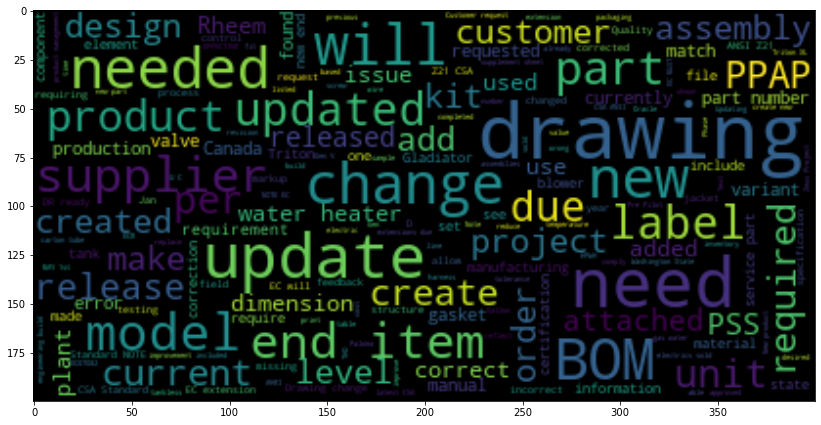

In [36]:
plt.figure(figsize=(14,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

## Word Count method

### in addition to above image of high frequency word, we can count words as below

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Tokenizers divide strings into lists of substrings.

If we wanted a computer to interpret these sentences, I might count up how many times I see each word. The computer will treat words like "running," "ran," and "runs" differently... but they mean very similar things (in this context)!

Lemmatizing and stemming are two forms of shortening words so we can combine similar forms of the same word.

When we "lemmatize" data, we take words and attempt to return their lemma, or the base/dictionary form of a word.

### Tokenizing and Stemming Data

In [37]:
# Tokenizing and Lemmatizing Data
from nltk.stem.porter import PorterStemmer

def tokenize_stemming(text1_col):
    # Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')
    
    # Tokenize text
    tokens = [tokenizer.tokenize(text1.lower()) for text1 in text1_col]
    
    # Instantiate PorterStemmer.
    p_stemmer = PorterStemmer()
    
    tokens_stem = []
    # lemmatize words
    for words in tokens:
        stem_list = [p_stemmer.stem(i) for i in words]
        stem_post = ''
        for word in stem_list:
            stem_post += (word+' ')
        tokens_stem.append(stem_post.strip())
    
    return (tokens_stem)

In [38]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muhammad.tahir.ctr\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [40]:
stem_token_list = tokenize_stemming(df2['SPECIAL_INSTRUCTIONS'])

In [42]:
stem_token_list[2]

'as wa releas at ec ac but bom wa not structur at the ec as a through m should have bom'

### Stemming Data

When we "stem" data, we take words and attempt to return a base form of the word. It tends to be cruder than using lemmatization. There's a method developed by Porter in 1980 that explains the algorithm used below.

In [43]:
# Tokenizing and Lemmatizing Data
from nltk.stem.porter import PorterStemmer

# Instantiate PorterStemmer.
p_stemmer = PorterStemmer()

In [44]:
# Stem the word "computer."
p_stemmer.stem("computer")

'comput'

In [45]:
# Stem the word "computation."
p_stemmer.stem("computation")

'comput'

In [46]:
# Stem the word "computationally."
p_stemmer.stem("computationally")

'comput'

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import regex as re
from sklearn.feature_extraction import text

In [48]:
cvec = CountVectorizer()
stem_features = cvec.fit_transform(stem_token_list)

In [49]:
stem_features

<1366x1748 sparse matrix of type '<class 'numpy.int64'>'
	with 20108 stored elements in Compressed Sparse Row format>

In [50]:
vocab = cvec.get_feature_names()
print(vocab)

['_b', 'ab', 'abl', 'about', 'abov', 'ac', 'accept', 'access', 'accessori', 'accident', 'accommod', 'accompani', 'accomplish', 'accord', 'accordinto', 'accumul', 'accur', 'acknowledg', 'across', 'action', 'activ', 'actual', 'ad', 'adapt', 'adaptor', 'add', 'addit', 'address', 'adhes', 'adjust', 'adopt', 'adr', 'advantag', 'advertis', 'ae', 'aesthet', 'af', 'affect', 'after', 'aftermarket', 'ag', 'again', 'against', 'agenc', 'ago', 'agre', 'ahri', 'ai', 'aid', 'aim', 'air', 'ak', 'alarm', 'alfredo', 'align', 'all', 'allow', 'alreadi', 'also', 'altern', 'altitud', 'am', 'amazon', 'ambient', 'amend', 'america', 'amount', 'an', 'analysi', 'analyz', 'anc', 'and', 'angela', 'angl', 'angular', 'ani', 'annual', 'anod', 'anoth', 'ansi', 'antenna', 'anthoni', 'anymor', 'anyth', 'ao', 'ap', 'apart', 'apcom', 'app', 'appear', 'appli', 'applic', 'approach', 'appropri', 'approv', 'approx', 'arabia', 'arabian', 'are', 'area', 'aren', 'aris', 'armando', 'around', 'arrow', 'art', 'artwork', 'as', 'asap

In [54]:
def term_counts(df, stop_list = None,n_gram = (1,1)):
    
    # Count Vectorize
    cvec = CountVectorizer(stop_words = stop_list,ngram_range= n_gram)
    title_cvec = pd.DataFrame(cvec.fit_transform(stem_token_list).toarray(),
                          columns = cvec.get_feature_names())

    # See word counts
    counts = title_cvec.sum().sort_values(0, ascending=False)
    
    return counts

Text(0, 0.5, 'Words')

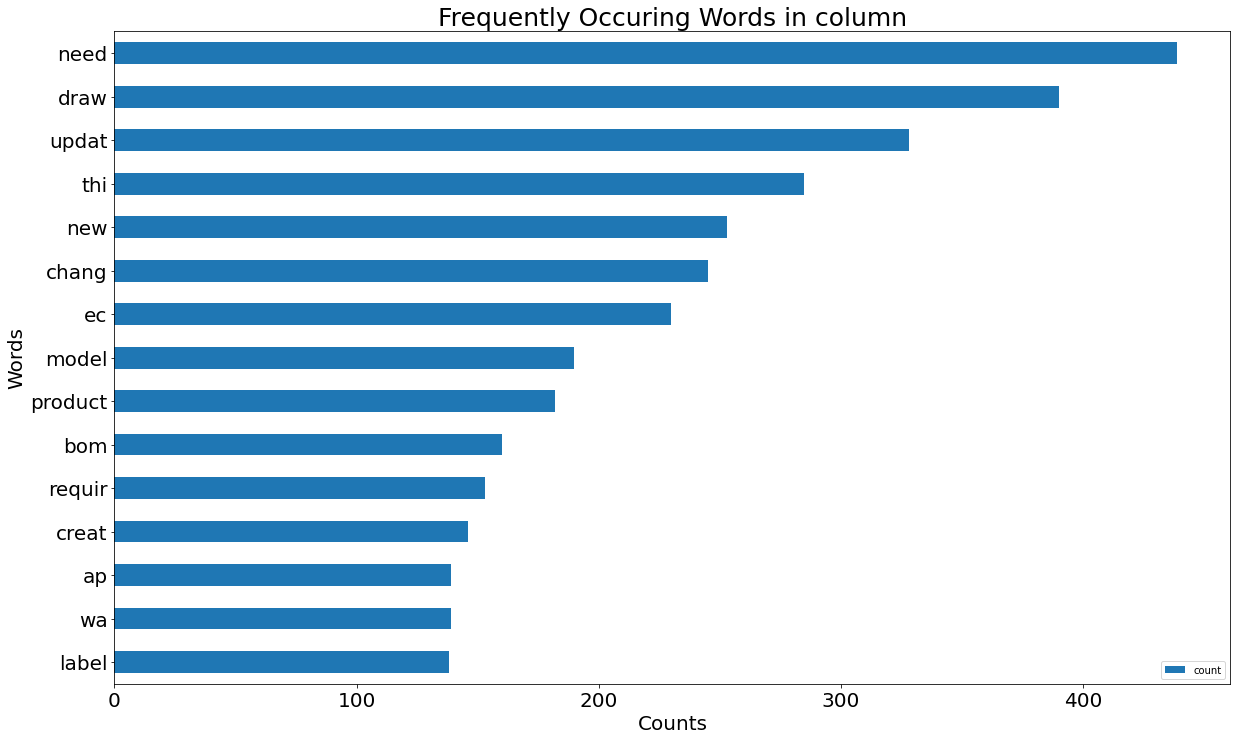

In [55]:
special_instruction_counts = pd.DataFrame(term_counts(df = stem_token_list,n_gram=(1,1),stop_list = 'english'), columns=["count"])

special_instruction_top = special_instruction_counts.head(15).sort_values(by = 'count',ascending = True)
special_instruction_top.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

Text(0, 0.5, 'Words')

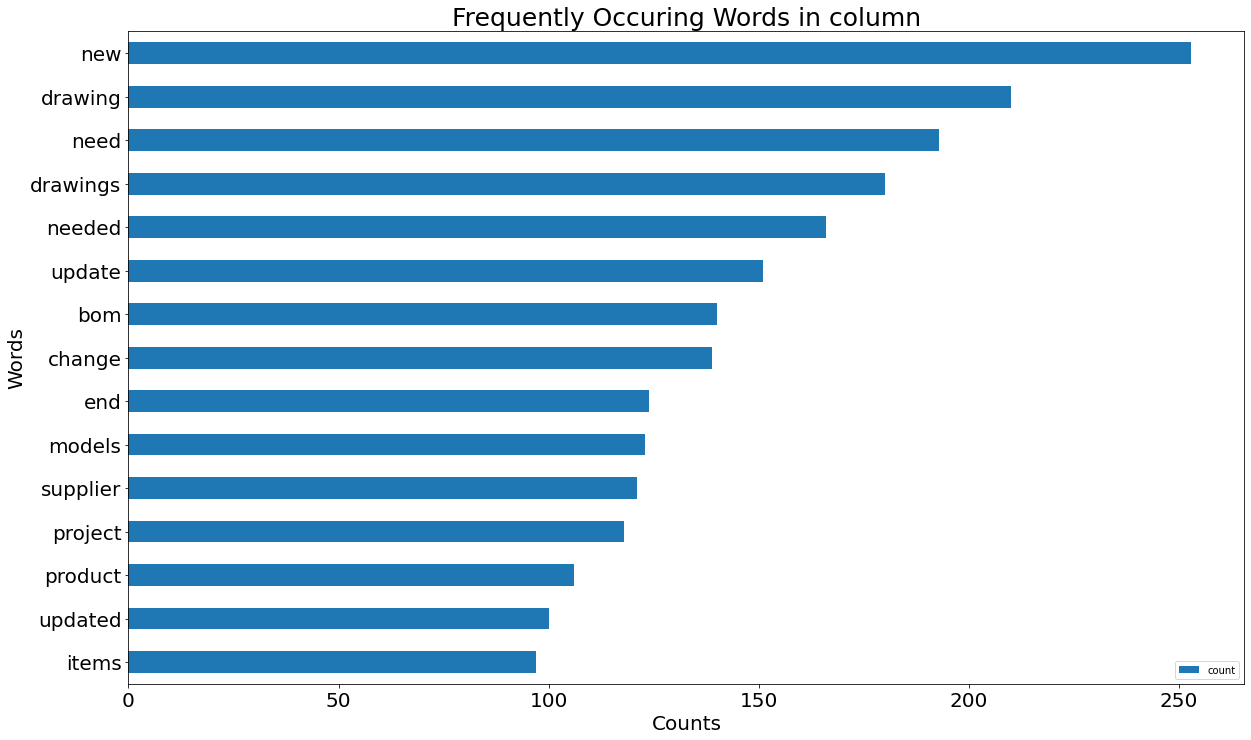

In [53]:
special_instruction_counts = pd.DataFrame(term_counts(df = df2['SPECIAL_INSTRUCTIONS'],n_gram=(1,1),stop_list = 'english'), columns=["count"])

special_instruction_top = special_instruction_counts.head(15).sort_values(by = 'count',ascending = True)
special_instruction_top.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

Text(0, 0.5, 'Words')

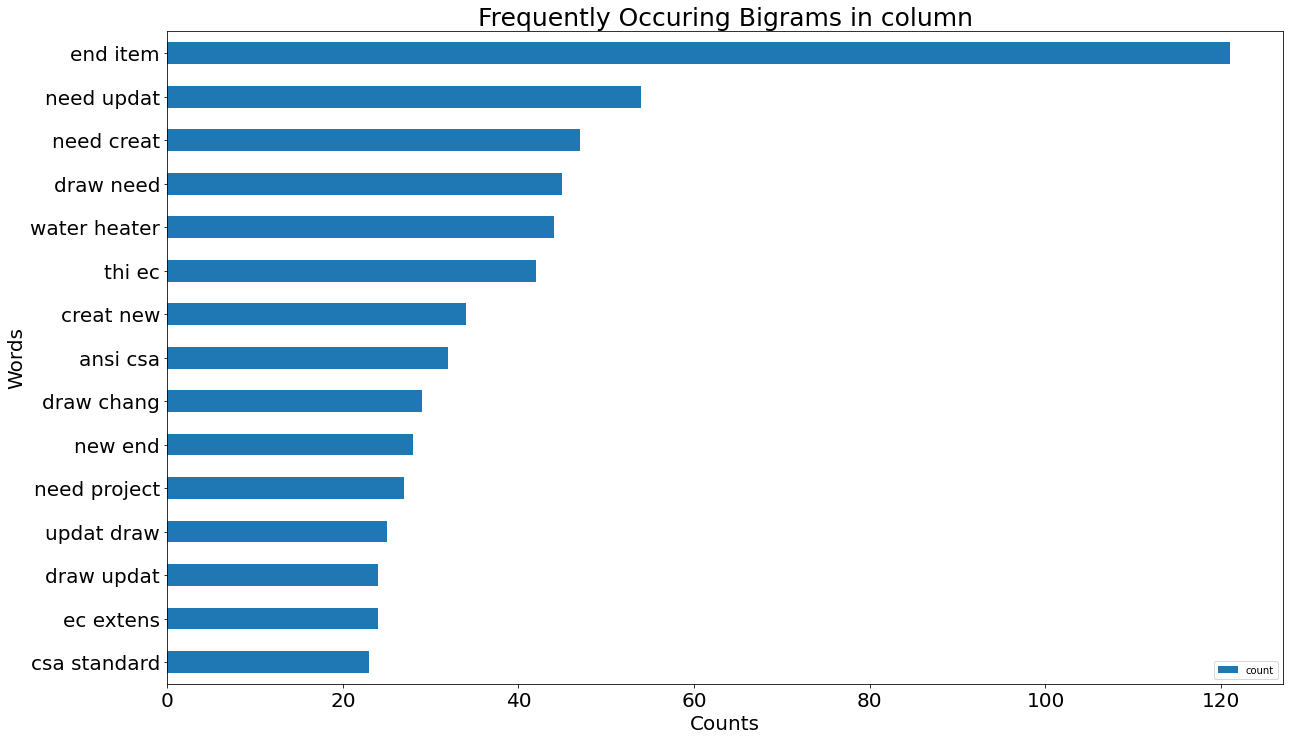

In [56]:
special_instruction_counts = pd.DataFrame(term_counts(df = stem_token_list,n_gram=(2,2),stop_list = 'english'), columns=["count"])

special_instruction_top = special_instruction_counts.head(15).sort_values(by = 'count',ascending = True)
special_instruction_top.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Bigrams in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

In [57]:
# Print English stopwords.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhammad.tahir.ctr\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Remove stopwords from "spam_tokens."
no_stop_words = [word for word in vocab if word not in stopwords.words('english')]

In [59]:
# Check it
print(no_stop_words)

['_b', 'ab', 'abl', 'abov', 'ac', 'accept', 'access', 'accessori', 'accident', 'accommod', 'accompani', 'accomplish', 'accord', 'accordinto', 'accumul', 'accur', 'acknowledg', 'across', 'action', 'activ', 'actual', 'ad', 'adapt', 'adaptor', 'add', 'addit', 'address', 'adhes', 'adjust', 'adopt', 'adr', 'advantag', 'advertis', 'ae', 'aesthet', 'af', 'affect', 'aftermarket', 'ag', 'agenc', 'ago', 'agre', 'ahri', 'ai', 'aid', 'aim', 'air', 'ak', 'alarm', 'alfredo', 'align', 'allow', 'alreadi', 'also', 'altern', 'altitud', 'amazon', 'ambient', 'amend', 'america', 'amount', 'analysi', 'analyz', 'anc', 'angela', 'angl', 'angular', 'ani', 'annual', 'anod', 'anoth', 'ansi', 'antenna', 'anthoni', 'anymor', 'anyth', 'ao', 'ap', 'apart', 'apcom', 'app', 'appear', 'appli', 'applic', 'approach', 'appropri', 'approv', 'approx', 'arabia', 'arabian', 'area', 'aris', 'armando', 'around', 'arrow', 'art', 'artwork', 'asap', 'ask', 'asm', 'assembl', 'assi', 'assign', 'assist', 'associ', 'assur', 'asv', 'at

## including stop words in below count

In [60]:
cvec = CountVectorizer()
# Fit our CountVectorizer on the training data and transform training data.
special_instruction_cvec = pd.DataFrame(cvec.fit_transform(df2['SPECIAL_INSTRUCTIONS']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {special_instruction_cvec.shape[1]}')
special_instruction_cvec.sum()[special_instruction_cvec.sum() >= 105].sort_values(ascending = False)

Number of Unique Words: 2898


the         1684
to          1202
and          628
for          604
in           482
is           471
be           420
of           396
this         285
new          253
on           225
with         222
drawing      210
will         197
need         193
are          190
drawings     180
needed       166
not          159
update       151
bom          140
change       139
was          139
have         126
end          124
models       123
supplier     121
part         120
project      118
that         112
by           110
product      106
dtype: int64

## Removing stop words in below count

In [62]:
cvec = CountVectorizer(stop_words='english')
# Fit our CountVectorizer on the training data and transform training data.
special_instruction_cvec_stop = pd.DataFrame(cvec.fit_transform(stem_token_list).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {special_instruction_cvec_stop.shape[1]}')
special_instruction_cvec_stop.sum()[special_instruction_cvec_stop.sum() >= 100].sort_values(ascending = False)

Number of Unique Words: 1598


need        439
draw        390
updat       328
thi         285
new         253
chang       245
ec          230
model       190
product     182
bom         160
requir      153
creat       146
ap          139
wa          139
label       138
item        136
supplier    125
end         125
project     118
current     118
releas      116
ppap        105
use         104
dtype: int64

## Sentiment Analysis

In [63]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\muhammad.tahir.ctr\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
# Instantiate Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [66]:
# Calculate sentiment of yelp_1.
sia.polarity_scores(df_notes)

{'neg': 0.035, 'neu': 0.888, 'pos': 0.077, 'compound': 1.0}

## Description

In [67]:
description = df2['DESCRIPTION']
df_description = ' '.join(description.to_list())

In [68]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
word_cloud_desc = WordCloud(max_font_size=40).generate(df_description)

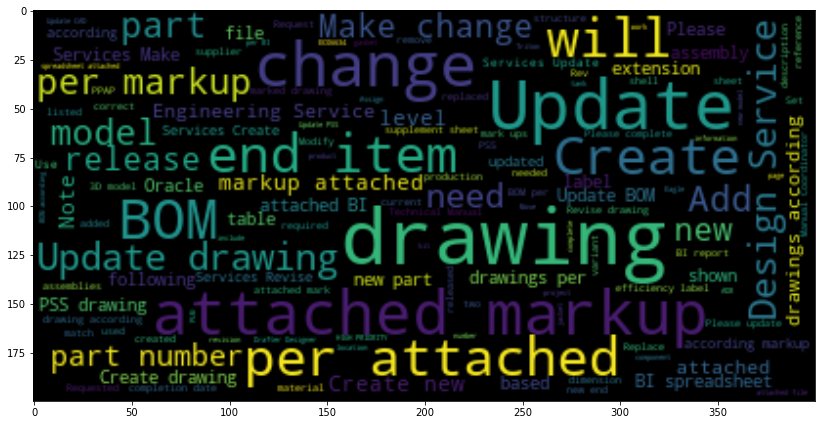

In [69]:
plt.figure(figsize=(14,8))
plt.imshow(word_cloud_desc, interpolation='bilinear')
plt.show()

### word count and visual

# Here we have more details of description column

Text(0, 0.5, 'Words')

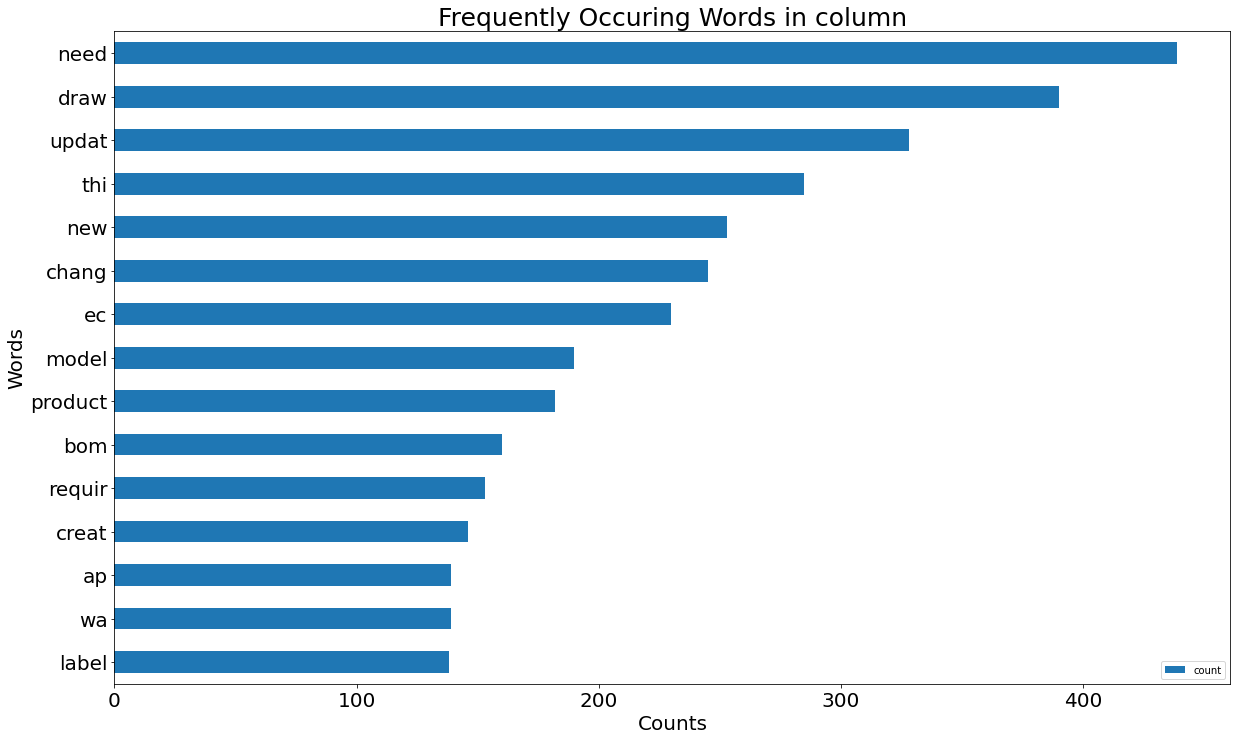

In [70]:
desc_counts = pd.DataFrame(term_counts(df = df2['DESCRIPTION'],n_gram=(1,1),stop_list = 'english'), columns=["count"])

desc_counts_words = desc_counts.head(15).sort_values(by = 'count',ascending = True)
desc_counts_words.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

Text(0, 0.5, 'Words')

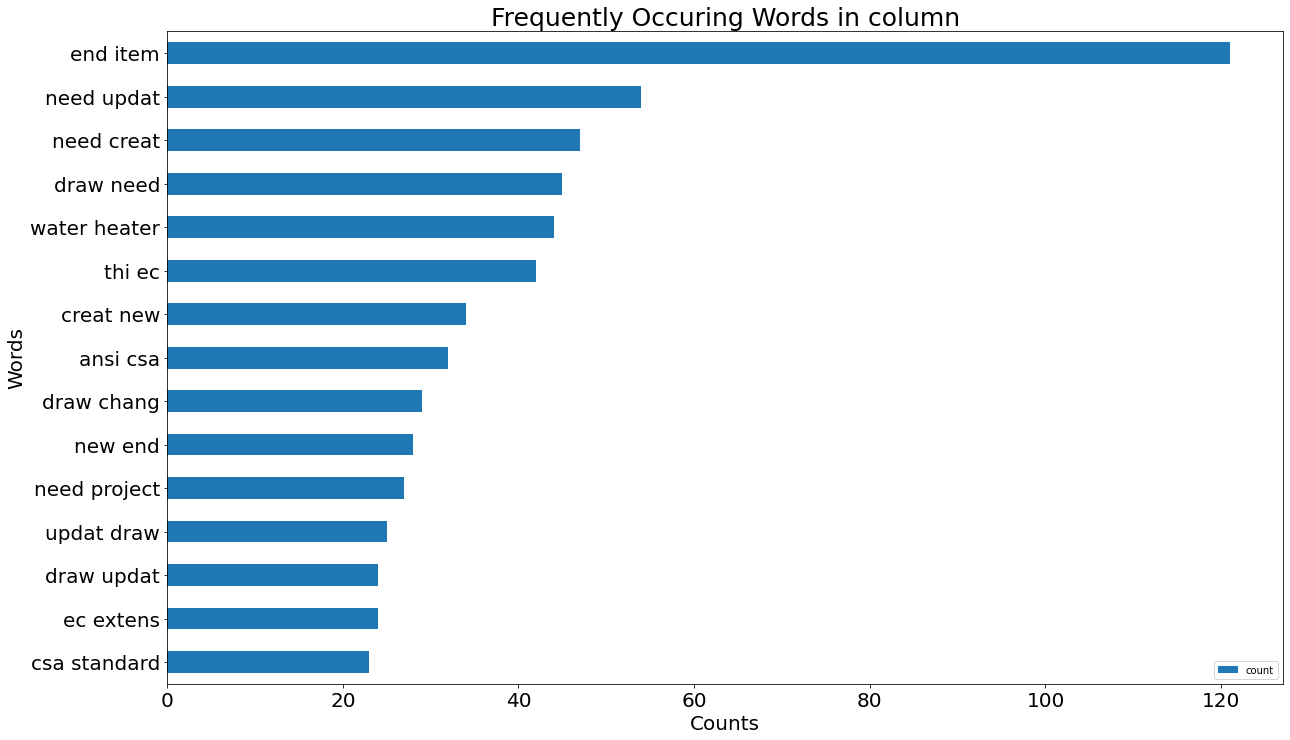

In [71]:
desc_counts = pd.DataFrame(term_counts(df = df2['DESCRIPTION'],n_gram=(2,2),stop_list = 'english'), columns=["count"])

desc_counts_words = desc_counts.head(15).sort_values(by = 'count',ascending = True)
desc_counts_words.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

Text(0, 0.5, 'Words')

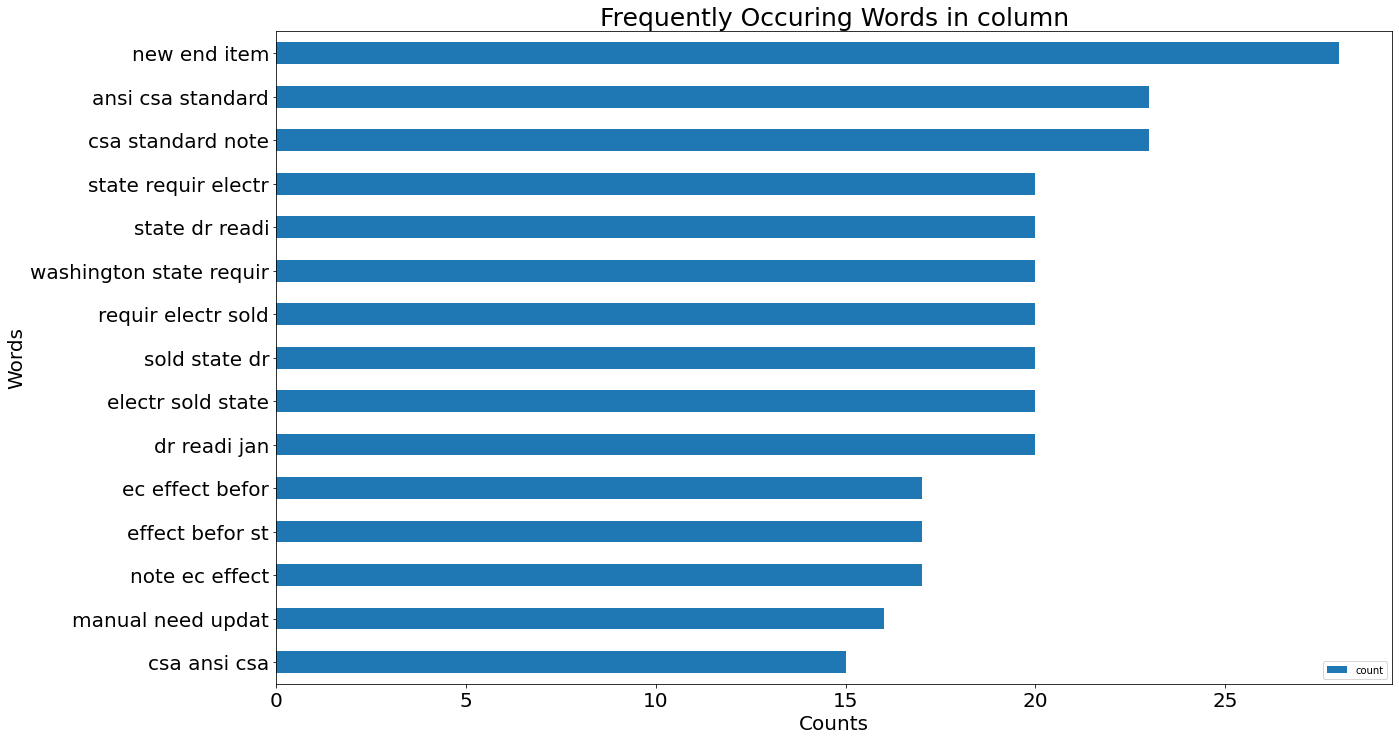

In [72]:
desc_counts = pd.DataFrame(term_counts(df = df2['DESCRIPTION'],n_gram=(3,3),stop_list = 'english'), columns=["count"])

desc_counts_words = desc_counts.head(15).sort_values(by = 'count',ascending = True)
desc_counts_words.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

In [73]:
cvec = CountVectorizer()
# Fit our CountVectorizer on the training data and transform training data.
desc_cvec = pd.DataFrame(cvec.fit_transform(df2['DESCRIPTION']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {desc_cvec.shape[1]}')
desc_cvec.sum()[desc_cvec.sum() >= 150].sort_values(ascending = False)

Number of Unique Words: 3534


the          1720
to           1178
attached      892
and           739
for           688
update        659
drawing       571
drawings      556
in            508
per           482
create        432
new           361
markup        338
of            321
is            305
on            300
according     286
bom           286
as            282
be            271
markups       268
services      266
this          247
part          237
changes       235
change        235
make          204
end           188
design        180
will          179
with          176
bi            166
are           164
items         162
please        157
from          157
release       153
dtype: int64

In [74]:
cvec = CountVectorizer(stop_words='english')
# Fit our CountVectorizer on the training data and transform training data.
desc_cvec = pd.DataFrame(cvec.fit_transform(df2['DESCRIPTION']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {desc_cvec.shape[1]}')
desc_cvec.sum()[desc_cvec.sum() >= 100].sort_values(ascending = False)

Number of Unique Words: 3370


attached       892
update         659
drawing        571
drawings       556
create         432
new            361
markup         338
according      286
bom            286
markups        268
services       266
change         235
changes        235
make           204
end            188
design         180
bi             166
items          162
release        153
pss            137
add            134
model          130
models         125
level          106
engineering    105
revise         101
dtype: int64

In [75]:
# sentiment analysis
sia.polarity_scores(df_description)

{'neg': 0.011, 'neu': 0.901, 'pos': 0.087, 'compound': 1.0}

# Title work

In [76]:
title = df2['TITLE']
df_title = ' '.join(title.to_list())

In [77]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
word_cloud_title = WordCloud(max_font_size=40).generate(df_title)

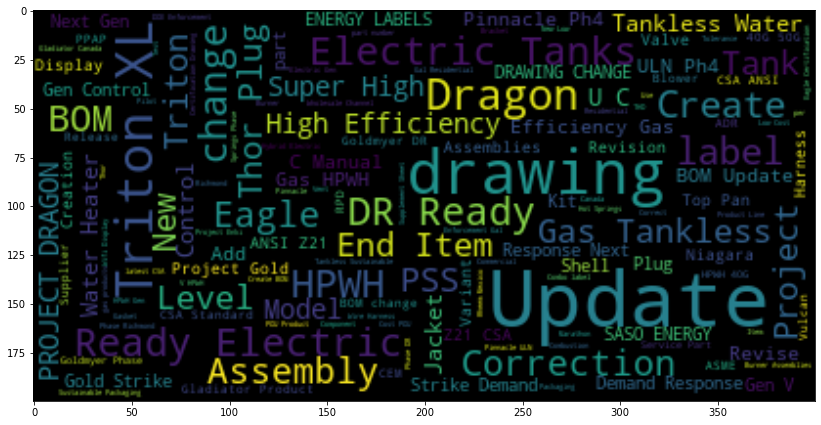

In [78]:
plt.figure(figsize=(14,8))
plt.imshow(word_cloud_title, interpolation='bilinear')
plt.show()

Text(0, 0.5, 'Words')

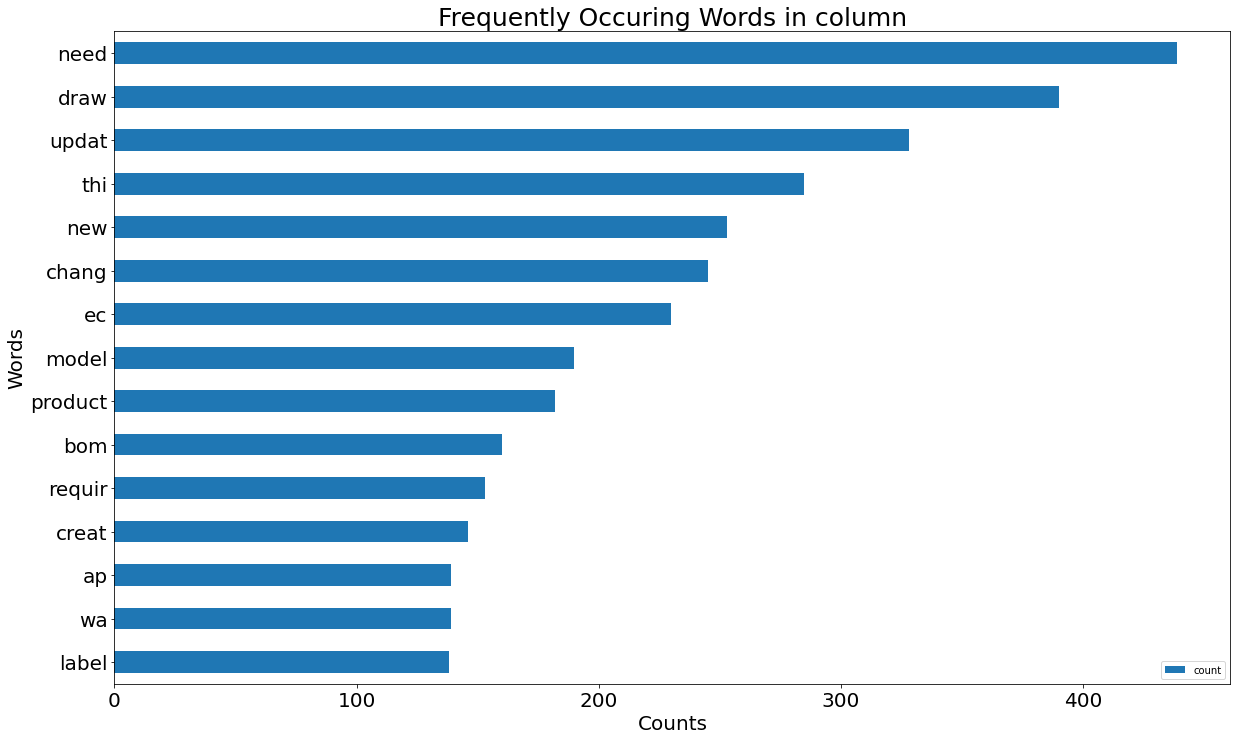

In [79]:
title_counts = pd.DataFrame(term_counts(df = df2['TITLE'],n_gram=(1,1),stop_list = 'english'), columns=["count"])

title_counts_words = title_counts.head(15).sort_values(by = 'count',ascending = True)
title_counts_words.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

Text(0, 0.5, 'Words')

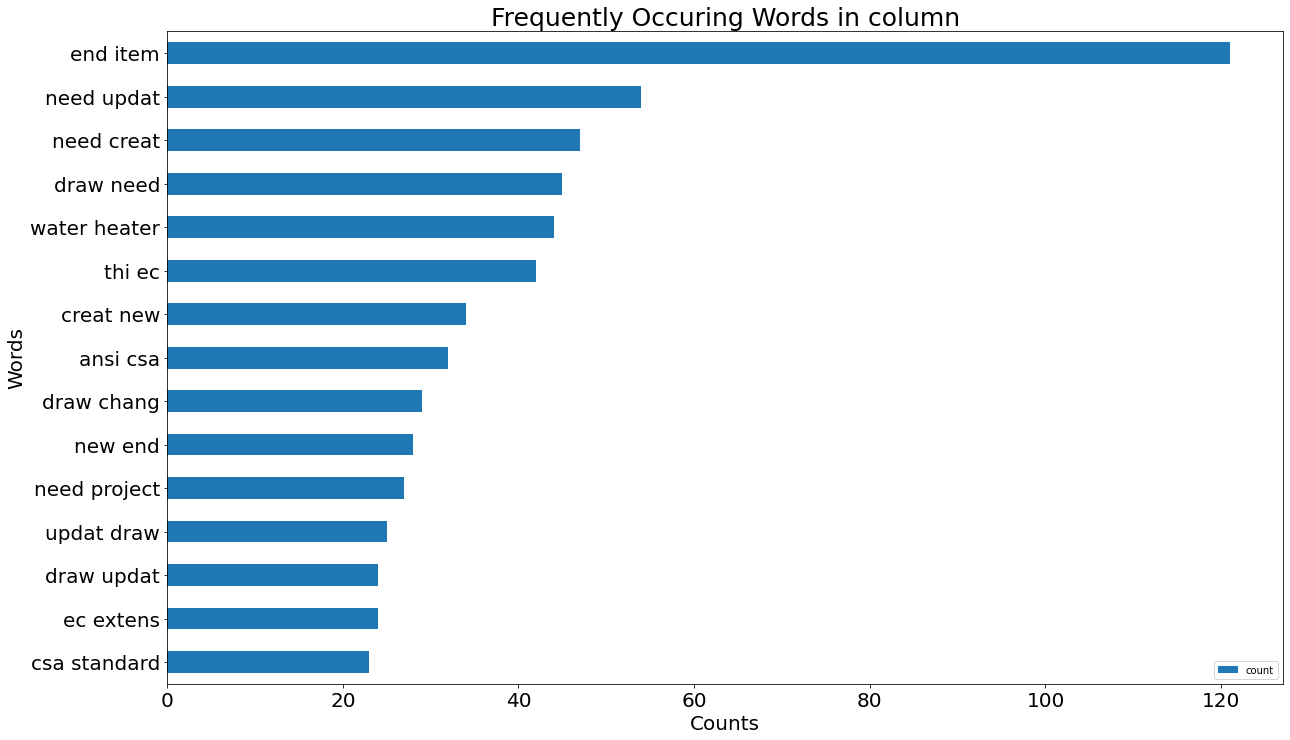

In [80]:
title_counts = pd.DataFrame(term_counts(df = df2['TITLE'],n_gram=(2,2),stop_list = 'english'), columns=["count"])

title_counts_words = title_counts.head(15).sort_values(by = 'count',ascending = True)
title_counts_words.plot(kind = 'barh',figsize=(20,12),fontsize=20)
plt.title('Frequently Occuring Words in column',size = 25)
plt.xlabel('Counts', size = 20)
plt.ylabel('Words', size = 20)

In [81]:
# sentiment analysis
sia.polarity_scores(df_title)

{'neg': 0.027, 'neu': 0.879, 'pos': 0.094, 'compound': 0.9999}

In [82]:
sia.polarity_scores('love')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}

In [83]:
sia.polarity_scores('hate')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

In [84]:
cvec = CountVectorizer()
# Fit our CountVectorizer on the training data and transform training data.
title_cvec = pd.DataFrame(cvec.fit_transform(df2['TITLE']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {title_cvec.shape[1]}')
title_cvec.sum()[title_cvec.sum() >= 50].sort_values(ascending = False)

Number of Unique Words: 1532


update      228
for         153
to          138
and         135
triton      126
drawing     113
electric    111
hpwh        108
project     101
bom          96
xl           96
gas          94
dragon       92
tankless     74
change       74
in           71
create       70
gen          70
new          65
eagle        60
drawings     60
tanks        53
plug         52
ready        51
dr           51
dtype: int64

In [85]:
cvec = CountVectorizer(stop_words='english')
# Fit our CountVectorizer on the training data and transform training data.
title_cvec = pd.DataFrame(cvec.fit_transform(df2['TITLE']).todense(),
                          columns = cvec.get_feature_names())
print(f'Number of Unique Words: {title_cvec.shape[1]}')
title_cvec.sum()[title_cvec.sum() >= 50].sort_values(ascending = False)

Number of Unique Words: 1476


update      228
triton      126
drawing     113
electric    111
hpwh        108
project     101
bom          96
xl           96
gas          94
dragon       92
change       74
tankless     74
create       70
gen          70
new          65
eagle        60
drawings     60
tanks        53
plug         52
ready        51
dr           51
dtype: int64

## Recommendation

we can specify any project or task or unit and then perform analysis. this filtering method will help us to perform better sentiment analysis about any specific point.

This filtering method will help us to have better word count or analysis about any specific point.

what is ECN about and what exactly we need here or can separate the data ?


Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document (s)



## References

-- https://www.displayr.com/how-to-show-sentiment-word-clouds/

-- https://www.datacamp.com/community/tutorials/wordcloud-python

-- https://realpython.com/python-nltk-sentiment-analysis/

-- https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

-- https://asperbrothers.com/blog/sentiment-analysis-in-python/

-- https://algotrading101.com/learn/sentiment-analysis-python-guide/

-- https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
